# K-Means Clustering: Handwriting Recognition

This project is inspired by the CodeCademy project under the same name. While CodeCademy does have a walkthrough on how to do the project, I have elected to do attempt the project on my own locally first.

To begin, we import the dataset from sklearn, as well as any relevant packages.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import datasets

# Load dataset and look at description
digits = datasets.load_digits()
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [8]:
# Convert to pandas df and check .head()
digits_df = pd.DataFrame(data=digits.data, columns=digits.feature_names)
digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [10]:
# Append and check targets
digits_df['target'] = digits.target
print(digits_df['target'].value_counts())

target
3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64


What we know so far then: we have a set of about 1800 handwritten digits ranging from 0 - 9, with uniform distribution on the target variable. Each data point corresponds with the values in 64 different pixels (8x8), in the range of 0-16, which likely corresponds with how dark that pixel is.

Let's being clustering using KMeans. We will begin with 10 clusters, and then later verify that this is the optimal number using inertia and the elbow method.

In [11]:
# Setup and fit the model
model = KMeans(n_clusters=10)
model.fit(digits.data)
print(model.inertia_)

1167828.2926243402


The lower the inertia the better, but how do we know if this is considered 'low' inertia? Let's graph it against other numbers of cluters to check.

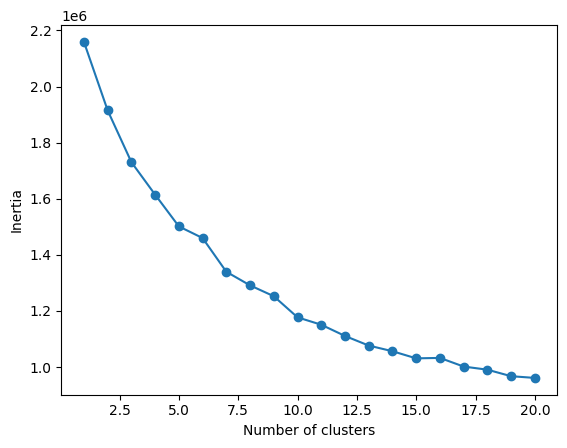

In [16]:
# Setup lists for comparison
num_clusters = list(range(1, 21))
inertias = []

# Loop through each k and get its inertia
for k in range(1, 21):
    model = KMeans(n_clusters=k)
    model.fit(digits.data)
    inertias.append(model.inertia_)

# Setup graph
plt.plot(num_clusters, inertias, '-o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

plt.show()

Inertia should always decrease with number of clusters, since it is based on the 'tightness' of each cluster, so what we look for is the elbow of the graph, or the point where the decrease becomes significantly less. This appears to happen around 10 clusters, so our initial assumption was correct. Depending on the clustering, this can also happen around 8 or 9 clusters, since certain digits can overlap each other pretty easily, like 1 and 7 or 8 and 3.

Now lets move on to creating the clusters and observing the outputs. We refit our model to 10 clusters and use matplotlib to show the cluster digits.

In [33]:
# Refit model
model = KMeans(n_clusters=10, random_state=1)
model.fit(digits.data)

# Observe cluster centroid data
print(model.cluster_centers_)

[[ 0.00000000e+00  5.75418994e-01  8.47486034e+00  1.44469274e+01
   1.39720670e+01  6.92178771e+00  5.25139665e-01 -2.77555756e-17
   1.11731844e-02  4.17318436e+00  1.27150838e+01  9.12290503e+00
   1.11675978e+01  1.19385475e+01  1.74860335e+00  1.11731844e-02
   5.58659218e-03  2.07262570e+00  3.91620112e+00  3.10055866e+00
   1.16759777e+01  9.84916201e+00  7.65363128e-01 -1.38777878e-17
  -2.16840434e-19  1.39664804e-01  1.03910615e+00  8.25698324e+00
   1.40837989e+01  6.56983240e+00  1.78770950e-01 -4.33680869e-19
   0.00000000e+00  6.14525140e-02  6.36871508e-01  4.54748603e+00
   1.19608939e+01  1.21229050e+01  2.21229050e+00  0.00000000e+00
  -1.73472348e-18  4.41340782e-01  1.39664804e+00  7.48603352e-01
   4.23463687e+00  1.22793296e+01  6.31284916e+00  5.58659218e-03
   1.73472348e-18  8.82681564e-01  7.37430168e+00  6.74860335e+00
   8.46368715e+00  1.35139665e+01  6.25139665e+00  2.01117318e-01
  -1.08420217e-19  4.58100559e-01  9.32960894e+00  1.48100559e+01
   1.41675

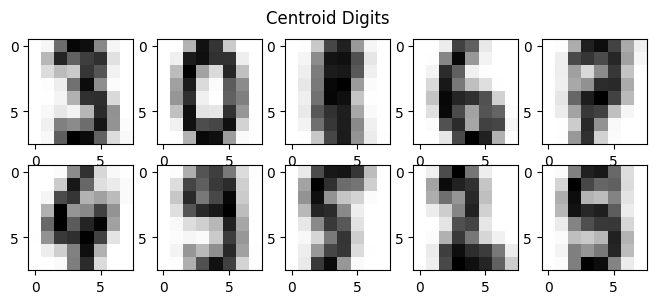

In [34]:
# Setup figure
fig = plt.figure(figsize=(8, 3))
fig.suptitle('Centroid Digits')

# Graph each centroid (digit) on its own axis
for i in range(10):
    ax = fig.add_subplot(2, 5, 1 + i)
    ax.imshow(model.cluster_centers_[i].reshape((8, 8)), cmap=plt.cm.binary)

Now we see why it might be so hard to classify these digits. It looks like there might be some overlap at the last index between 8 and 5. 

For the most part, we can see that the clustering worked though. Clusters for the first 9 indexes seem pretty obvious, and likely only have minor overlapping between digits. 

# Conclusion

Overall, K-means clustering did a good job clustering together digits into the 10 groups. If we altered then random_state variable, we would obviously get different clusters which may or may not be better. In some testing on my end without the random_state, I mostly saw the algorithm struggling to distinguish between 3 and 8, and 1 and 7, which lined up with my initial hypothesis.

For further work on this topic, we could introduce our own handwritten digits and see how the algorithm classifies them. Additionally, we could look for more digits in other databases, since <200 digits is a pretty small sample size and would account for the issues the algorithm was encountering.